## Collatz lambda notebook

In [55]:
"""
This notebook analyses the binary growth of a Collatz sequence, denoted by lambda.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from math import log2
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from collatz import commons


# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 50
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

# START_VALUE = 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz components
analysis_frame = commons.odd_collatz_sequence_components(
    START_VALUE, K_FACTOR, MAX_ITERATIONS)

# Derive new fields
analysis_frame["alpha_i"] = analysis_frame["decimal"].apply(commons.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype('int64')
analysis_frame["alpha"] = analysis_frame["alpha_i"].cumsum()

analysis_frame["log2"] = analysis_frame["decimal"].apply(log2)
analysis_frame["bin_str"] = analysis_frame["decimal"].apply(commons.to_binary)
analysis_frame["bin_len"] = analysis_frame["log2"].astype('int64') + 1
analysis_frame["lambda_hyp"] = (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["lambda_max"] = analysis_frame["lambda_hyp"].astype('int64') + 2

prev_bin_len = list(analysis_frame[:-1]["bin_len"])
prev_bin_len.insert(0, prev_bin_len[0])
analysis_frame["bin_diff"] = analysis_frame["bin_len"] - pd.Series(prev_bin_len)

analysis_frame["lambda_i"] = analysis_frame["bin_diff"]
analysis_frame.loc[analysis_frame["lambda_i"] < 0, "lambda_i"] = 0
analysis_frame["lambda"] = analysis_frame["lambda_i"].cumsum()

next_decimal = list(analysis_frame[1:]["decimal"])
next_decimal.append(0)
analysis_frame["next_decimal"] = next_decimal

# Remove final result
analysis_frame = analysis_frame[:-1]

# Validate lambda
l_max_valid = int((analysis_frame["lambda"] > analysis_frame["lambda_max"]).sum()) < 1

# Print results
print_frame = analysis_frame[[
    "n", "variable", "decimal", "next_decimal",
    "log2", "bin_str", "bin_len",
    "lambda_i", "lambda", "lambda_max",
    "alpha"
]]

print_frame.columns = [
    "n","var", "dec", "next", 
    "log2", "b_str", "b_len",
    "l_i", "l", "l_max",
    "a"
]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "Lambda max valid:", l_max_valid,
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(), "\n")

Start value: 65  K: 3 Lambda max valid: True 

    n    var  dec  next      log2     b_str  b_len  l_i   l  l_max   a
0   1     vi   65   195  6.022368   1000001      7    0   0      3   0
1   1    kvi  195   196  7.607330  11000011      8    1   1      3   0
2   1  kvi+1  196    49  7.614710  11000100      8    0   1      3   2
3   2     vi   49   147  5.614710    110001      6    0   1      5   2
4   2    kvi  147   148  7.199672  10010011      8    2   3      5   2
5   2  kvi+1  148    37  7.209453  10010100      8    0   3      5   4
6   3     vi   37   111  5.209453    100101      6    0   3      6   4
7   3    kvi  111   112  6.794416   1101111      7    1   4      6   4
8   3  kvi+1  112     7  6.807355   1110000      7    0   4      6   8
9   4     vi    7    21  2.807355       111      3    0   4      8   8
10  4    kvi   21    22  4.392317     10101      5    2   6      8   8
11  4  kvi+1   22    11  4.459432     10110      5    0   6      8   9
12  5     vi   11    33  3.459

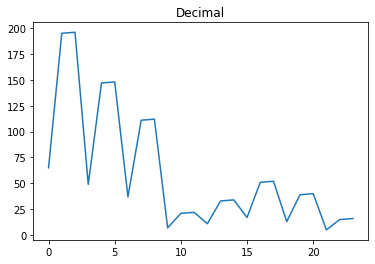

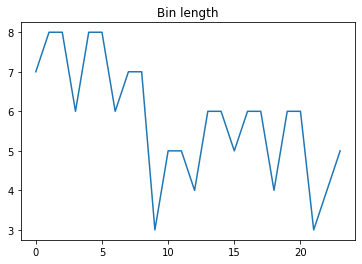

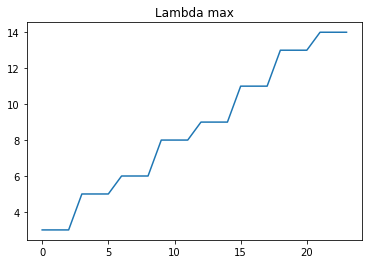

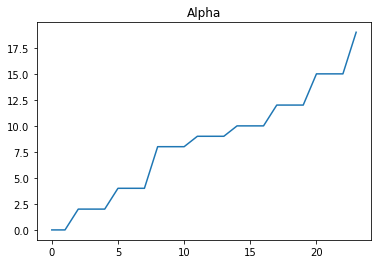

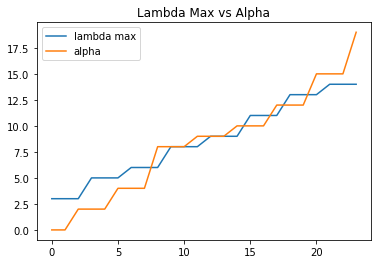

In [56]:
#Plot results
# Decimal
plt.figure()
plt.title("Decimal")
plt.plot(analysis_frame["decimal"], "-")

# Bin len
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

plt.figure()
plt.title("Lambda max")
plt.plot(analysis_frame["lambda_max"], "-")

plt.figure()
plt.title("Alpha")
plt.plot(analysis_frame["alpha"], "-")

plt.figure()
plt.title("Lambda Max vs Alpha")
plt.plot(analysis_frame["lambda_max"], label="lambda max")
plt.plot(analysis_frame["alpha"], label="alpha")
plt.legend()

plt.show()